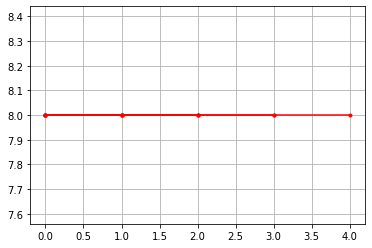

In [3]:
#importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

#defining the transfer function or hard limit
def tf(n):
    
    if n<0:
        return -1
    elif n >=0:
        return 1
    else:
        return 0

#defining the single neuron
def singleNeuron(xx, yy): 
    ww= [0,0,0,0]
    weight = matrix(ww)
    b = matrix([0])
    temp_err = []

    
    for pat, tar in zip(xx, yy):
        pat = matrix(pat)
        tar = matrix(tar)
        net = weight*pat.T + b
        ao = tf(net)

        
        error = (tar - ao).tolist()[0][0]
        temp_err.append(error)
        alpha = -1
        #error and weight bias updatation
        if error <0:
            weight=weight - alpha*pat
            b = b + alpha*error
        elif error > 0:
            weight=weight + alpha*pat
            b = b + alpha*error
        elif error == 0:
            weight = weight
            b = b
        
    return temp_err
    
 
def main():     
    #DATASET#
    
    plt.ion()
    plt.figure(1)
    xx = [[1,1,1,1],[-1,1,-1,1],[1,1,1,-1],[1,-1,-1,1]] #pattern
    yy = [1,1,-1,-1]
    sse_list = []
    for i in range(0,5):
        
        
        error_list = singleNeuron(xx, yy)

        sse_list.append((matrix(error_list)*matrix(error_list).T).tolist()[0][0])
        
        plt.subplot(111)
        plt.plot(sse_list, 'r.-')
        plt.grid(True)
        
        plt.draw()     
    
    
    
main()